In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [34]:
train = pd.read_csv("train.csv")
test= pd.read_csv("test.csv")

In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
y=train.Survived
X=train.drop(["Survived","PassengerId","Name","Ticket"],axis=1)

In [38]:
X[X.Embarked.isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,female,38.0,0,0,80.0,B28,NaN
829,1,female,62.0,0,0,80.0,B28,NaN


In [39]:
X["Embarked"] = X["Embarked"].fillna("C")

In [40]:
X.loc[(X["Embarked"]=="C")&(X["Sex"]=="female")&(X["Pclass"]==1),"Age"]=X.loc[(X["Embarked"]=="C")&(X["Sex"]=="female")&(X["Pclass"]==1),"Age"].fillna(38)

In [41]:
X.groupby(["Sex","Pclass","Embarked"]).mean()

Age     SibSp     Parch        Fare
Sex    Pclass Embarked                                           
female 1      C         36.888889  0.488889  0.288889  114.056296
              Q         33.000000  1.000000  0.000000   90.000000
              S         32.704545  0.604167  0.625000   99.026910
       2      C         19.142857  0.714286  0.571429   25.268457
              Q         30.000000  0.000000  0.000000   12.350000
              S         29.719697  0.477612  0.626866   21.912687
       3      C         14.062500  0.565217  0.826087   14.694926
              Q         22.850000  0.212121  0.242424   10.307833
              S         23.223684  1.238636  1.000000   18.670077
male   1      C         40.111111  0.238095  0.333333   93.536707
              Q         44.000000  2.000000  0.000000   90.000000
              S         41.897188  0.329114  0.253165   52.949947
       2      C         25.937500  0.500000  0.500000   25.421250
              Q         57.000000  0.000000  0.000000   12.350000
              S         30.875889  0.329897  0.195876   19.232474
       3      C         25.016800  0.232558  0.139535    9.352237
              Q         28.142857  0.589744  0.128205   11.924251
              S         26.574766  0.528302  0.252830   13.307149

In [42]:
X.loc[(X["Embarked"]=="C")&(X["Sex"]=="female")&(X["Pclass"]==2),"Age"]=X.loc[(X["Embarked"]=="C")&(X["Sex"]=="female")&(X["Pclass"]==2),"Age"].fillna(19)

In [43]:
X.loc[(X["Embarked"]=="C")&(X["Sex"]=="female")&(X["Pclass"]==3),"Age"]=X.loc[(X["Embarked"]=="C")&(X["Sex"]=="female")&(X["Pclass"]==3),"Age"].fillna(14)

In [44]:
X.loc[(X["Embarked"]=="Q")&(X["Sex"]=="female")&(X["Pclass"]==1),"Age"]=X.loc[(X["Embarked"]=="Q")&(X["Sex"]=="female")&(X["Pclass"]==1),"Age"].fillna(33)

In [45]:
X.loc[(X["Embarked"]=="Q")&(X["Sex"]=="female")&(X["Pclass"]==2),"Age"]=X.loc[(X["Embarked"]=="Q")&(X["Sex"]=="female")&(X["Pclass"]==2),"Age"].fillna(30)

In [46]:
X.loc[(X["Embarked"]=="Q")&(X["Sex"]=="female")&(X["Pclass"]==3),"Age"]=X.loc[(X["Embarked"]=="Q")&(X["Sex"]=="female")&(X["Pclass"]==3),"Age"].fillna(23)

In [47]:
X.loc[(X["Embarked"]=="S")&(X["Sex"]=="female")&(X["Pclass"]==1),"Age"]=X.loc[(X["Embarked"]=="S")&(X["Sex"]=="female")&(X["Pclass"]==1),"Age"].fillna(33)

In [48]:
X.loc[(X["Embarked"]=="S")&(X["Sex"]=="female")&(X["Pclass"]==2),"Age"]=X.loc[(X["Embarked"]=="S")&(X["Sex"]=="female")&(X["Pclass"]==2),"Age"].fillna(30)

In [49]:
X.loc[(X["Embarked"]=="S")&(X["Sex"]=="female")&(X["Pclass"]==3),"Age"]=X.loc[(X["Embarked"]=="S")&(X["Sex"]=="female")&(X["Pclass"]==3),"Age"].fillna(23)

In [50]:
X.loc[(X["Embarked"]=="C")&(X["Sex"]=="male")&(X["Pclass"]==1),"Age"]=X.loc[(X["Embarked"]=="C")&(X["Sex"]=="male")&(X["Pclass"]==1),"Age"].fillna(40)

In [51]:
X.loc[(X["Embarked"]=="C")&(X["Sex"]=="male")&(X["Pclass"]==2),"Age"]=X.loc[(X["Embarked"]=="C")&(X["Sex"]=="male")&(X["Pclass"]==2),"Age"].fillna(26)

In [52]:
X.loc[(X["Embarked"]=="C")&(X["Sex"]=="male")&(X["Pclass"]==3),"Age"]=X.loc[(X["Embarked"]=="C")&(X["Sex"]=="male")&(X["Pclass"]==3),"Age"].fillna(25)

In [53]:
X.loc[(X["Embarked"]=="Q")&(X["Sex"]=="male")&(X["Pclass"]==3),"Age"]=X.loc[(X["Embarked"]=="Q")&(X["Sex"]=="male")&(X["Pclass"]==3),"Age"].fillna(28)

In [54]:
X.loc[(X["Embarked"]=="S")&(X["Sex"]=="male")&(X["Pclass"]==1),"Age"]=X.loc[(X["Embarked"]=="S")&(X["Sex"]=="male")&(X["Pclass"]==1),"Age"].fillna(42)

In [55]:
X.loc[(X["Embarked"]=="S")&(X["Sex"]=="male")&(X["Pclass"]==2),"Age"]=X.loc[(X["Embarked"]=="S")&(X["Sex"]=="male")&(X["Pclass"]==2),"Age"].fillna(31)

In [56]:
X.loc[(X["Embarked"]=="S")&(X["Sex"]=="male")&(X["Pclass"]==3),"Age"]=X.loc[(X["Embarked"]=="S")&(X["Sex"]=="male")&(X["Pclass"]==3),"Age"].fillna(27)

In [57]:
X.Age.isnull().sum()

0

In [58]:
X.Cabin= X.Cabin.astype(str).apply(lambda a: a[0])

In [59]:
X.Cabin = X.Cabin.replace("n",np.nan)

In [60]:
X.Cabin = X.Cabin.fillna("C")

In [61]:
X.Cabin=X.Cabin.astype("category")
X.Embarked=X.Embarked.astype("category")
X.Sex = X.Sex.astype("category")

In [62]:
X.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null int64
Sex         891 non-null category
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       891 non-null category
Embarked    891 non-null category
dtypes: category(3), float64(2), int64(3)
memory usage: 38.1 KB


In [63]:
categorical_col = ["Embarked","Sex","Cabin"]
X= pd.get_dummies(X, prefix='Category_', columns=categorical_col)

In [69]:
train_X,val_X,train_y,val_y = train_test_split(X,y,test_size=0.2,random_state=0)

In [72]:
my_model = LogisticRegression()
my_model.fit(train_X,train_y)
predictions1=my_model.predict(val_X)

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(val_y, predictions1)
print(confusion_matrix)

[[95 15]
 [19 50]]


In [74]:
from sklearn import metrics

In [75]:
metrics.accuracy_score(val_y,predictions1)

0.81005586592178769

In [76]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold=model_selection.KFold(n_splits=10,random_state=7)
modelCV=LogisticRegression()
scoring="accuracy"
results = model_selection.cross_val_score(modelCV,train_X,train_y,cv=kfold,scoring=scoring)

In [77]:
results

array([ 0.79166667,  0.75      ,  0.8028169 ,  0.77464789,  0.8028169 ,
        0.83098592,  0.81690141,  0.78873239,  0.83098592,  0.81690141])

In [78]:
results.mean()

0.80064553990610343

In [79]:
from sklearn.metrics import classification_report
print(classification_report(val_y,predictions1))

             precision    recall  f1-score   support

          0       0.83      0.86      0.85       110
          1       0.77      0.72      0.75        69

avg / total       0.81      0.81      0.81       179



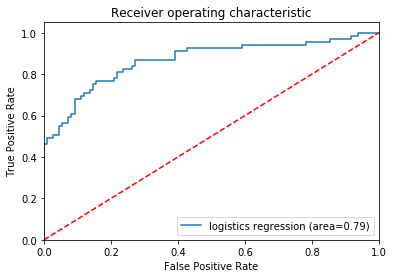

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(val_y,predictions1)
fpr,tpr,thresholds=roc_curve(val_y,my_model.predict_proba(val_X)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="logistics regression (area=%0.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [81]:
X_test = test.drop(["PassengerId","Ticket","Name"],axis=1)

In [82]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [83]:
X_test["Cabin"] = X_test.Cabin.astype(str).apply(lambda a: a[0])

In [84]:
X_test["Cabin"]=X_test.Cabin.replace("n",np.nan)

In [85]:
X_test["Cabin"]=X_test["Cabin"].fillna("C")

In [86]:
%matplotlib inline
import seaborn as sns

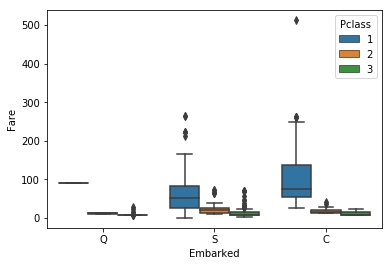

In [87]:
sns.boxplot(x=X_test.Embarked,y=X_test.Fare,hue=X_test.Pclass)

In [88]:
X_test[X_test["Fare"].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
152,3,male,60.5,0,0,NaN,C,S


In [89]:
X_test.Fare=X_test.Fare.fillna(14)

In [90]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Cabin       418 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [91]:
X_test.groupby(["Sex","Pclass","Embarked"]).mean()

Age     SibSp     Parch        Fare
Sex    Pclass Embarked                                           
female 1      C         41.000000  0.321429  0.500000  123.895682
              Q         37.000000  1.000000  0.000000   90.000000
              S         42.000000  0.857143  0.523810  105.737110
       2      C         19.750000  1.000000  0.750000   30.040625
              S         25.116800  0.461538  0.769231   25.884615
       3      C         24.166667  0.500000  0.625000   11.360950
              Q         25.681818  0.130435  0.000000    9.051813
              S         22.005152  0.853659  0.926829   16.825610
male   1      C         39.962963  0.535714  0.392857   96.251339
              S         41.173913  0.275862  0.172414   55.634341
       2      C         29.400000  0.000000  0.000000   14.451771
              Q         52.666667  0.000000  0.000000   11.273950
              S         29.813725  0.365385  0.173077   21.641827
       3      C         22.423077  0.407407  0.222222   10.450626
              Q         23.928571  0.277778  0.055556    8.931483
              S         24.939605  0.425743  0.405941   12.731556

In [92]:
X_test.loc[(X_test["Embarked"]=="C")&(X_test["Sex"]=="female")&(X_test["Pclass"]==1),"Age"]=X_test.loc[(X_test["Embarked"]=="C")&(X_test["Sex"]=="female")&(X_test["Pclass"]==1),"Age"].fillna(41)

In [93]:
X_test.loc[(X_test["Embarked"]=="C")&(X_test["Sex"]=="female")&(X_test["Pclass"]==2),"Age"]=X_test.loc[(X_test["Embarked"]=="C")&(X_test["Sex"]=="female")&(X_test["Pclass"]==2),"Age"].fillna(20)

In [94]:
X_test.loc[(X_test["Embarked"]=="Q")&(X_test["Sex"]=="female")&(X_test["Pclass"]==3),"Age"]=X_test.loc[(X_test["Embarked"]=="Q")&(X_test["Sex"]=="female")&(X_test["Pclass"]==3),"Age"].fillna(26)

In [95]:
X_test.loc[(X_test["Embarked"]=="S")&(X_test["Sex"]=="female")&(X_test["Pclass"]==1),"Age"]=X_test.loc[(X_test["Embarked"]=="S")&(X_test["Sex"]=="female")&(X_test["Pclass"]==1),"Age"].fillna(42)

In [96]:
X_test.loc[(X_test["Embarked"]=="S")&(X_test["Sex"]=="female")&(X_test["Pclass"]==2),"Age"]=X_test.loc[(X_test["Embarked"]=="S")&(X_test["Sex"]=="female")&(X_test["Pclass"]==2),"Age"].fillna(25)

In [97]:
X_test.loc[(X_test["Embarked"]=="S")&(X_test["Sex"]=="female")&(X_test["Pclass"]==3),"Age"]=X_test.loc[(X_test["Embarked"]=="S")&(X_test["Sex"]=="female")&(X_test["Pclass"]==3),"Age"].fillna(22)

In [98]:
X_test.loc[(X_test["Embarked"]=="C")&(X_test["Sex"]=="male")&(X_test["Pclass"]==1),"Age"]=X_test.loc[(X_test["Embarked"]=="C")&(X_test["Sex"]=="male")&(X_test["Pclass"]==1),"Age"].fillna(40)

In [99]:
X_test.loc[(X_test["Embarked"]=="C")&(X_test["Sex"]=="male")&(X_test["Pclass"]==2),"Age"]=X_test.loc[(X_test["Embarked"]=="C")&(X_test["Sex"]=="male")&(X_test["Pclass"]==2),"Age"].fillna(29)

In [100]:
X_test.loc[(X_test["Embarked"]=="C")&(X_test["Sex"]=="male")&(X_test["Pclass"]==3),"Age"]=X_test.loc[(X_test["Embarked"]=="C")&(X_test["Sex"]=="male")&(X_test["Pclass"]==3),"Age"].fillna(22)

In [101]:
X_test.loc[(X_test["Embarked"]=="Q")&(X_test["Sex"]=="male")&(X_test["Pclass"]==2),"Age"]=X_test.loc[(X_test["Embarked"]=="Q")&(X_test["Sex"]=="male")&(X_test["Pclass"]==2),"Age"].fillna(53)

In [102]:
X_test.loc[(X_test["Embarked"]=="Q")&(X_test["Sex"]=="male")&(X_test["Pclass"]==3),"Age"]=X_test.loc[(X_test["Embarked"]=="Q")&(X_test["Sex"]=="male")&(X_test["Pclass"]==3),"Age"].fillna(24)

In [103]:
X_test.loc[(X_test["Embarked"]=="S")&(X_test["Sex"]=="male")&(X_test["Pclass"]==1),"Age"]=X_test.loc[(X_test["Embarked"]=="S")&(X_test["Sex"]=="male")&(X_test["Pclass"]==1),"Age"].fillna(41)

In [104]:
X_test.loc[(X_test["Embarked"]=="S")&(X_test["Sex"]=="male")&(X_test["Pclass"]==2),"Age"]=X_test.loc[(X_test["Embarked"]=="S")&(X_test["Sex"]=="male")&(X_test["Pclass"]==2),"Age"].fillna(30)

In [105]:
X_test.loc[(X_test["Embarked"]=="S")&(X_test["Sex"]=="male")&(X_test["Pclass"]==3),"Age"]=X_test.loc[(X_test["Embarked"]=="S")&(X_test["Sex"]=="male")&(X_test["Pclass"]==3),"Age"].fillna(25)

In [106]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         416 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Cabin       418 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [107]:
X_test.loc[(X_test["Embarked"]=="C")&(X_test["Sex"]=="female")&(X_test["Pclass"]==3),"Age"]=X_test.loc[(X_test["Embarked"]=="C")&(X_test["Sex"]=="female")&(X_test["Pclass"]==3),"Age"].fillna(24)

In [108]:
X_test.Sex=X_test.Sex.astype("category")
X_test.Cabin = X_test.Cabin.astype("category")
X_test.Embarked=X_test.Embarked.astype("category")

In [109]:
categorical_col2 = ["Embarked","Sex","Cabin"]
X_test= pd.get_dummies(X_test, prefix='Category_', columns=categorical_col2)

In [110]:
X_test["Category_T"] = 0

In [111]:
my_predictions_1=my_model.predict(X_test)

In [665]:
my_submission_1 = pd.DataFrame({"PassengerId":test.PassengerId,"Survived":my_predictions_1})
my_submission_1.to_csv("submission1.csv",index=False)

In [112]:
from sklearn.ensemble import RandomForestClassifier


In [113]:
y1=train.Survived
X_train_rf = train.drop(["Name","Ticket","PassengerId","Survived"],axis=1)
X_test_rf = test.drop(["Name","Ticket","PassengerId"],axis=1)

In [114]:
X_train_rf["Cabin"] = X_train_rf["Cabin"].astype(str).apply(lambda a: a[0])
X_test_rf["Cabin"] = X_test_rf["Cabin"].astype(str).apply(lambda a: a[0])

In [115]:
X_train_rf["Cabin"] = X_train_rf["Cabin"].replace("n",np.nan)
X_test_rf["Cabin"] = X_test_rf["Cabin"].replace("n",np.nan)

In [116]:

X_train_rf["Cabin"]=X_train_rf["Cabin"].astype("category")
X_train_rf["Embarked"]=X_train_rf["Embarked"].astype("category")
X_train_rf["Sex"] = X_train_rf["Sex"].astype("category")


X_test_rf["Cabin"]=X_test_rf["Cabin"].astype("category")
X_test_rf["Embarked"]=X_test_rf["Embarked"].astype("category")
X_test_rf["Sex"] = X_test_rf["Sex"].astype("category")



In [117]:

X_train_rf = pd.get_dummies(X_train_rf,prefix="Category_",columns = ["Embarked","Sex","Cabin"])

X_test_rf = pd.get_dummies(X_test_rf,prefix="Category_",columns = ["Embarked","Sex","Cabin"])

In [119]:
X_train_rf

,Pclass,Age,SibSp,Parch,Fare,Category__C,Category__Q,Category__S,Category__female,Category__male,Category__A,Category__B,Category__C,Category__D,Category__E,Category__F,Category__G,Category__T
0,3,22.0,1,0,7.2500,0,0,1,0,1,0,0,0,0,0,0,0,0
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0,1,0,0,0,0,0
2,3,26.0,0,0,7.9250,0,0,1,1,0,0,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,1,1,0,0,0,1,0,0,0,0,0
4,3,35.0,0,0,8.0500,0,0,1,0,1,0,0,0,0,0,0,0,0
5,3,NaN,0,0,8.4583,0,1,0,0,1,0,0,0,0,0,0,0,0
6,1,54.0,0,0,51.8625,0,0,1,0,1,0,0,0,0,1,0,0,0
7,3,2.0,3,1,21.0750,0,0,1,0,1,0,0,0,0,0,0,0,0
8,3,27.0,0,2,11.1333,0,0,1,1,0,0,0,0,0,0,0,0,0
9,2,14.0,1,0,30.0708,1,0,0,1,0,0,0,0,0,0,0,0,0


In [123]:
train_X_rf,val_X_rf,train_y_rf,val_y_rf = train_test_split(X_train_rf,y1,test_size=0.2,random_state=0)

In [124]:
train_X_rf=train_X_rf.fillna(-999)
train_y_rf = train_y_rf.fillna(-999)
val_X_rf=val_X_rf.fillna(-999)
val_y_rf=val_y_rf.fillna(-999)
X_test_rf = X_test_rf.fillna(-999)

In [125]:
my_model_2=RandomForestClassifier()
my_model_2.fit(train_X_rf,train_y_rf)
my_predictions_2=my_model_2.predict(val_X_rf)

In [126]:
metrics.accuracy_score(val_y_rf,my_predictions_2)

0.82681564245810057

In [127]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
kfold2 = model_selection.KFold(n_splits=10,random_state=7)
scoring="accuracy"
modelcv=RandomForestClassifier()
results2 = model_selection.cross_val_score(modelcv,train_X_rf,train_y_rf,scoring=scoring,cv=kfold)


In [128]:
results2

array([ 0.75      ,  0.75      ,  0.76056338,  0.8028169 ,  0.85915493,
        0.84507042,  0.77464789,  0.71830986,  0.8028169 ,  0.77464789])

In [129]:
results.mean()

0.80064553990610343

In [130]:
X_test_rf["Category_T"]=0

In [131]:
predictions2= my_model_2.predict(X_test_rf)

In [778]:
my_submission_2= pd.DataFrame({"PassengerId":test.PassengerId,"Survived":predictions2})
my_submission_2.to_csv("submission2.csv",index=False)